# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈


# ✅ **Logistic Regression** ✅

In statistics, the logistic model is a statistical model that models the probability of one event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression is estimating the parameters of a logistic model.

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 16.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

!pip install yfinance
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Load data into a Data Frame**

In [4]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


# **Data Preprocessing**

In [5]:
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)

In [6]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,-1
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,-1


# **Null value testing and data clearance**

In [9]:
# See how many null values in each column

dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Buy_Sell     0
dtype: int64

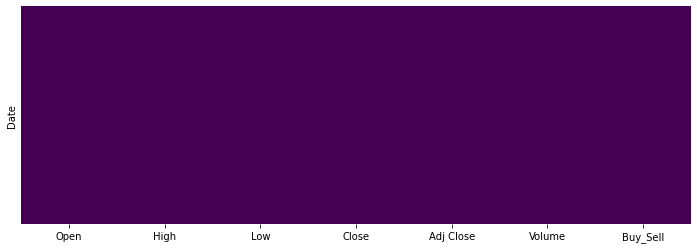

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [11]:
# see number of rows, number of columns
dataset.shape

(1171, 7)

In [12]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  8197


In [13]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Buy_Sell'], dtype='object')

In [14]:
# See data types of the Columns

dataset.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Buy_Sell       int64
dtype: object

In [15]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1171 entries, 2014-01-02 to 2018-08-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1171 non-null   float64
 1   High       1171 non-null   float64
 2   Low        1171 non-null   float64
 3   Close      1171 non-null   float64
 4   Adj Close  1171 non-null   float64
 5   Volume     1171 non-null   int64  
 6   Buy_Sell   1171 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 73.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad02c0ed50>,
      dtype=object)

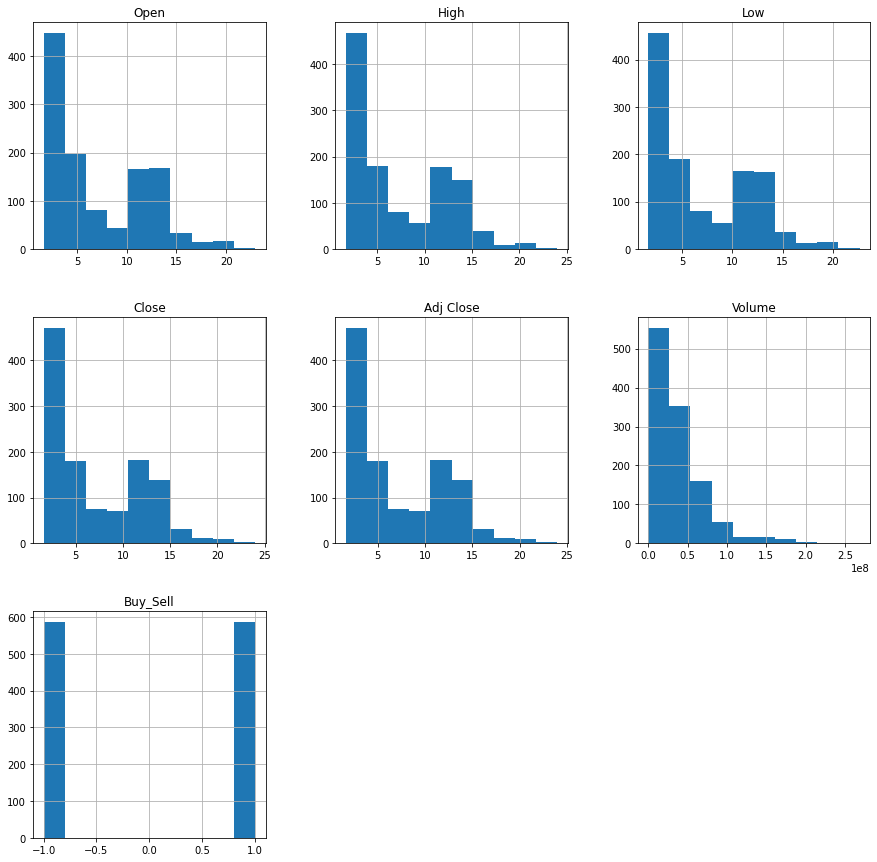

In [16]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [17]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1.171000e+03,1171.000000
mean,6.998651,7.143945,6.852844,7.000196,7.000196,3.761912e+07,-0.000854
std,4.854418,4.952265,4.752834,4.860349,4.860349,3.354346e+07,1.000427
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,-1.000000
25%,2.710000,2.780000,2.660000,2.705000,2.705000,1.308165e+07,-1.000000
50%,4.250000,4.350000,4.170000,4.270000,4.270000,2.900080e+07,-1.000000
75%,11.565000,11.770000,11.305000,11.550000,11.550000,5.057790e+07,1.000000
max,22.910000,24.000000,22.670000,23.980000,23.980000,2.683365e+08,1.000000


# **Define X and Y**

In [18]:
dataset['Buy_Sell'] = dataset['Buy_Sell'].astype('int')

In [19]:
# Define X
X = np.asarray(dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume']])
X[0:5]

array([[3.84999990e+00, 3.98000002e+00, 3.83999991e+00, 3.95000005e+00,
        2.05484000e+07],
       [3.98000002e+00, 4.00000000e+00, 3.88000011e+00, 4.00000000e+00,
        2.28872000e+07],
       [4.01000023e+00, 4.17999983e+00, 3.99000001e+00, 4.13000011e+00,
        4.23983000e+07],
       [4.19000006e+00, 4.25000000e+00, 4.11000013e+00, 4.17999983e+00,
        4.29321000e+07],
       [4.23000002e+00, 4.26000023e+00, 4.13999987e+00, 4.17999983e+00,
        3.06787000e+07]])

In [20]:
# Define y
y = np.asarray(dataset['Buy_Sell'])
y[0:5]

array([ 1,  1,  1, -1, -1])

In [21]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.64889264, -0.63916156, -0.63417558, -0.62783551, -0.50913086],
       [-0.62210145, -0.63512128, -0.62575591, -0.6175438 , -0.43937661],
       [-0.61591883, -0.59875878, -0.60260195, -0.5907853 ,  0.14253812],
       [-0.57882339, -0.58461776, -0.57734305, -0.58049363,  0.1584586 ],
       [-0.57057996, -0.58259757, -0.57102838, -0.58049363, -0.20699665]])

# **Split Train data and Test data**

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (878, 5) (878,)
Test set: (293, 5) (293,)
